In [1]:
import pandas as pd
import datetime as dt # for date data type
import seaborn as sns # For creating plots



In [2]:
data = pd.read_csv("Traffic-uus-2.csv")
data

,Time,Scheme type nr,Scheme type_1,Accident type_3,Weather_1,Illumination_2,Road covering condition_1,Road type_2,Road element,Road covering,...,District,GPS X,GPS Y,Curviness,Lat,Lon,Death toll,Individuals,Vehicles,Casualties
0,24.10.2014 08:45:00,104.0,Vehicle conflict with pedestrian,Collision with pedestrian,Clear,Daylight,Dry,Street,Road without special features,Permanent pavement,...,Kesklinna linnaosa,6588678.0,542647.0,Straight road,59.433796,24.751479,0,2,1,1
1,24.10.2014 13:45:00,401.0,Vehicles moving to same direction (not passing),Collision with vehicle moving in front,Cloudy,Daylight,Dry,Street,Y-shaped junction,Permanent pavement,...,Põhja-Tallinna linnaosa,6589522.0,541467.0,Gentle curve,59.441488,24.730850,0,2,2,1
2,08.11.2014 15:10:00,207.0,Single vehicle accident,Collision with vehicle moving in front,Cloudy,Daylight,Dry,Street,Road without special features,Permanent pavement,...,Pirita linnaosa,6593961.0,547646.0,Straight road,59.480681,24.840724,0,2,2,1
3,17.11.2014 17:32:00,606.0,Vehicles from opposite directions,Collision with oncoming vehicle,Cloudy,Night time lighting off,Dry,Supporting road,T-shaped junction,Permanent pavement,...,NaN,6569324.0,516628.0,Gentle curve,59.261884,24.291529,0,2,2,2
4,28.04.2015 07:55:00,505.0,Vehicles from crossing directions,Collision with vehicle from side,Rainfall,Daylight,Wet,Street,T-shaped junction,Permanent pavement,...,Kesklinna linnaosa,6586430.0,541953.0,Straight road,59.413688,24.738815,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,21.05.2017 09:35:00,207.0,Single vehicle accident,Collision with vehicle standing in front,Clear,Daylight,Dry,Secondary highway,Road without special features,Permanent pavement,...,Jõõpre küla,6480481.0,519847.0,Straight road,58.464149,24.340068,0,3,2,1
12628,21.05.2017 13:50:00,601.0,Vehicles from opposite directions,Collision with oncoming vehicle,Sun shining low,Daylight,Dry,Main highway,Bridge,Permanent pavement,...,Konuvere küla,6519056.0,524082.0,Straight road,58.810261,24.416737,0,2,3,1
12629,22.05.2017 18:29:00,203.0,Single vehicle accident,Vehicle off the road,Clear,Daylight,Dry,Main highway,Road without special features,Permanent pavement,...,Jaanika küla,6558038.0,519643.0,Gentle curve,59.160443,24.343375,0,1,1,1
12630,22.05.2017 20:02:00,401.0,Vehicles moving to same direction (not passing),Collision with vehicle moving in front,Clear,Daylight,Dry,Street,+-shaped junction,Permanent pavement,...,Tartu linn,NaN,NaN,Straight road,NaN,NaN,0,2,2,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Time                                    12632 non-null  object 
 1   Scheme type nr                          12359 non-null  float64
 2   Scheme type_1                           12359 non-null  object 
 3   Accident type_3                         12548 non-null  object 
 4   Weather_1                               12432 non-null  object 
 5   Illumination_2                          12459 non-null  object 
 6   Road covering condition_1               12632 non-null  object 
 7   Road type_2                             12469 non-null  object 
 8   Road element                            12241 non-null  object 
 9   Road covering                           12464 non-null  object 
 10  Road condition                          12388 non-null  ob

In [10]:
data.Time = pd.to_datetime(data.Time)
data['Time_day']=data.Time.dt.dayofweek #monday=0 ... sunday=6
data['Time_dayofmonth']=data.Time.dt.day
data['Time_month']=data.Time.dt.month
data['Time_year']=data.Time.dt.year
data['Time_hour']=data.Time.dt.hour
data

,Time,Scheme type nr,Scheme type_1,Accident type_3,Weather_1,Illumination_2,Road covering condition_1,Road type_2,Road element,Road covering,...,Lon,Death toll,Individuals,Vehicles,Casualties,Time_day,Time_month,Time_year,Time_hour,Time_dayofmonth
0,2014-10-24 08:45:00,104.0,Vehicle conflict with pedestrian,Collision with pedestrian,Clear,Daylight,Dry,Street,Road without special features,Permanent pavement,...,24.751479,0,2,1,1,4,10,2014,8,24
1,2014-10-24 13:45:00,401.0,Vehicles moving to same direction (not passing),Collision with vehicle moving in front,Cloudy,Daylight,Dry,Street,Y-shaped junction,Permanent pavement,...,24.730850,0,2,2,1,4,10,2014,13,24
2,2014-08-11 15:10:00,207.0,Single vehicle accident,Collision with vehicle moving in front,Cloudy,Daylight,Dry,Street,Road without special features,Permanent pavement,...,24.840724,0,2,2,1,0,8,2014,15,11
3,2014-11-17 17:32:00,606.0,Vehicles from opposite directions,Collision with oncoming vehicle,Cloudy,Night time lighting off,Dry,Supporting road,T-shaped junction,Permanent pavement,...,24.291529,0,2,2,2,0,11,2014,17,17
4,2015-04-28 07:55:00,505.0,Vehicles from crossing directions,Collision with vehicle from side,Rainfall,Daylight,Wet,Street,T-shaped junction,Permanent pavement,...,24.738815,0,2,2,1,1,4,2015,7,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12627,2017-05-21 09:35:00,207.0,Single vehicle accident,Collision with vehicle standing in front,Clear,Daylight,Dry,Secondary highway,Road without special features,Permanent pavement,...,24.340068,0,3,2,1,6,5,2017,9,21
12628,2017-05-21 13:50:00,601.0,Vehicles from opposite directions,Collision with oncoming vehicle,Sun shining low,Daylight,Dry,Main highway,Bridge,Permanent pavement,...,24.416737,0,2,3,1,6,5,2017,13,21
12629,2017-05-22 18:29:00,203.0,Single vehicle accident,Vehicle off the road,Clear,Daylight,Dry,Main highway,Road without special features,Permanent pavement,...,24.343375,0,1,1,1,0,5,2017,18,22
12630,2017-05-22 20:02:00,401.0,Vehicles moving to same direction (not passing),Collision with vehicle moving in front,Clear,Daylight,Dry,Street,+-shaped junction,Permanent pavement,...,NaN,0,2,2,2,0,5,2017,20,22


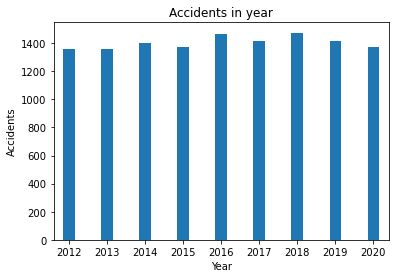

In [5]:
ax = data['Time_year'].value_counts().sort_index().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Accidents')
ax.set_xlabel('Year')
ax.set_title('Accidents in year');

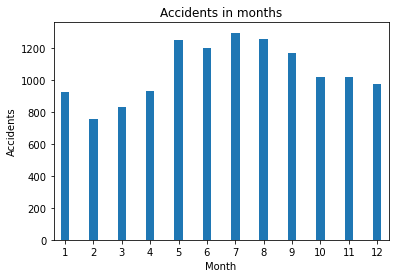

In [6]:
ax = data['Time_month'].value_counts().sort_index().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Accidents')
ax.set_xlabel('Month')
ax.set_title('Accidents in months');

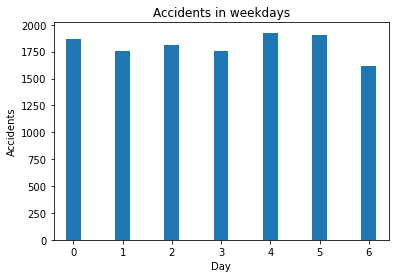

In [7]:
ax = data['Time_day'].value_counts().sort_index().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Accidents')
ax.set_xlabel('Day')
ax.set_title('Accidents in weekdays');

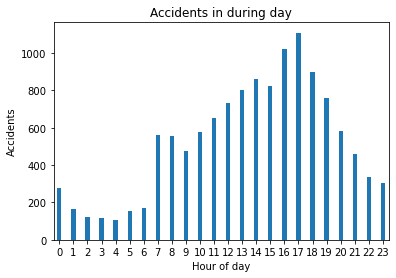

In [8]:
ax = data['Time_hour'].value_counts().sort_index().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Accidents')
ax.set_xlabel('Hour of day')
ax.set_title('Accidents in during day');

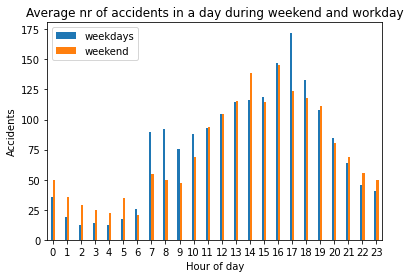

In [9]:
weekdays=data[data['Time_day']<5]['Time_hour'].value_counts().sort_index()/5
weekend=data[data['Time_day']>=5]['Time_hour'].value_counts().sort_index()/2

average=pd.concat([weekdays, weekend], axis=1)
average.columns=['weekdays', 'weekend']
ax=average.plot(kind = 'bar',rot = 0, width = 0.3)

ax.set_ylabel('Accidents')
ax.set_xlabel("Hour of day")
ax.set_title('Average nr of accidents in a day during weekend and workday');

In [51]:
#counting how many accidents happen in fridays and friday the 13-th
friday=len(data[(data['Time_day']==4) & (data["Time_dayofmonth"]!=13) ])
friday13=len(data[(data['Time_day']==4) & (data["Time_dayofmonth"]==13)])

friday,friday13

(1853, 73)

In [52]:
#counting the number of fridays and friday the 13-th
num_fridays = len(data[(data['Time_day']==4) & (data["Time_dayofmonth"]!=13)][['Time_dayofmonth','Time_month', 'Time_year']].drop_duplicates())
num_friday13s = len(data[(data['Time_day']==4) & (data["Time_dayofmonth"]==13)][['Time_dayofmonth','Time_month', 'Time_year']].drop_duplicates())
num_fridays, num_friday13s

(436, 17)

In [53]:
#average number of accedents on feiday and friday the 13-th
friday/num_fridays, friday13/num_friday13s

(4.25, 4.294117647058823)

In [84]:
# testing if the number of accedents on friday the 13 is higher 
friday=(data[(data['Time_day']==4) & (data["Time_dayofmonth"]!=13) ]).value_counts(['Time_dayofmonth','Time_month', 'Time_year'])
friday13=(data[(data['Time_day']==4) & (data["Time_dayofmonth"]==13)]).value_counts(['Time_dayofmonth','Time_month', 'Time_year'])
friday.values

from scipy import stats
print(stats.shapiro(friday.values)) # test for the normality of distibution
print(stats.shapiro(friday13.values))

stats.ttest_ind(friday.values, friday13.values, equal_var = False)

ShapiroResult(statistic=0.935391902923584, pvalue=8.268785504396414e-13)
ShapiroResult(statistic=0.9276058077812195, pvalue=0.19842995703220367)


Ttest_indResult(statistic=-0.08770321635027999, pvalue=0.9310999880271478)

Since the pvalue is higher than .05, we can not reject the null hypothesis and have to conclude that there is not a statistically significant difference on the number of accidents on friday and friday the 13-th. In terms of number of accedents the friday the 13 is not unhappy day

In [92]:
#counting how many accidents happen in midsummerdays and other days
MSD=len(data[(data['Time_month']==6) & (data["Time_dayofmonth"]==23) ])
Other=len(data[~(data['Time_month']==6) & (data["Time_dayofmonth"]==23)])


#counting the number of accedents on midsummerdays and other days
num_MSD = len(data[(data['Time_month']==6) & (data["Time_dayofmonth"]==23)][['Time_dayofmonth','Time_month', 'Time_year']].drop_duplicates())
num_other= len(data[~(data['Time_month']==6) & (data["Time_dayofmonth"]==23)][['Time_dayofmonth','Time_month', 'Time_year']].drop_duplicates())
num_MSD, num_other

#average number of accedents on midsummerdays and other days
MSD/num_MSD, Other/num_other

(5.111111111111111, 3.8247422680412373)

In [93]:
# testing if the number of accedents on midsummerdays and other days
MSD=(data[(data['Time_month']==6) & (data["Time_dayofmonth"]==23) ]).value_counts(['Time_dayofmonth','Time_month', 'Time_year'])
Other=(data[~(data['Time_month']==6) & (data["Time_dayofmonth"]==23)]).value_counts(['Time_dayofmonth','Time_month', 'Time_year'])


from scipy import stats
print(stats.shapiro(MSD.values)) # test for the normality of distibution
print(stats.shapiro(Other.values))

stats.ttest_ind(MSD.values, Other.values, equal_var = False)

ShapiroResult(statistic=0.826120138168335, pvalue=0.04039105772972107)
ShapiroResult(statistic=0.924606204032898, pvalue=3.256885247537866e-05)


Ttest_indResult(statistic=1.6418324955871573, pvalue=0.13380311083749863)

Although the average number of accendents were rather different the pvalue is still higher than .05, we can not reject the null hypothesis and have to conclude that there is not a statistically significant difference on the number of accidents on midsummerdays and other days. 